In [28]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import pysal
import esda

import pandas as pd
import pandas_profiling
import geopandas as gpd
import libpysal as lps
import numpy as np
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline



In [29]:
# Load the csv dataset to python
Ede = np.loadtxt(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Data\Pre_processing\training_data.csv",delimiter = ',', skiprows = 1, usecols=range(2, 10))
print(Ede.shape)
print(Ede)

(94, 8)
[[ 3.30000e+01  8.74500e+01  4.01000e+01  8.75500e+01  2.13000e+00
   7.80000e-01  1.00000e-01  5.36000e-02]
 [ 2.34300e+01  8.50400e+01  3.59300e+01  9.02100e+01  4.57000e+00
   3.90000e-01  5.00000e-02  3.75060e+00]
 [ 2.55500e+01  1.19060e+02  2.55500e+01  7.98100e+01  1.21000e+01
   1.15000e+00  1.40000e-01  8.15850e+00]
 [ 5.50000e+01  1.96730e+02 -1.00000e-01  6.28700e+01  2.77000e+01
   1.06000e+00  1.30000e-01  2.25548e+01]
 [ 8.51900e+01  1.86840e+02  3.65500e+01  7.56800e+01  2.53900e+01
   2.96000e+00  3.60000e-01  2.97249e+01]
 [ 1.30100e+02  2.20570e+02  2.34300e+01  8.11300e+01  2.87000e+01
   2.14000e+00  2.60000e-01  2.78275e+01]
 [ 1.19230e+02  2.13710e+02  5.86500e+01  8.18400e+01  2.78700e+01
   1.72000e+00  2.10000e-01  2.07506e+01]
 [ 1.14350e+02  2.18100e+02  1.90300e+01  8.00300e+01  2.63200e+01
   2.06000e+00  2.50000e-01  1.81026e+01]
 [ 8.57300e+01  1.76000e+02  2.45300e+01  8.67700e+01  1.48300e+01
   1.52000e+00  1.80000e-01  1.49371e+01]
 [ 5.33900e

In [30]:
Ede_x = Ede[:,0:7]
Ede_y = Ede[:,7]

print(Ede_x)


print(Ede_y)


[[ 3.3000e+01  8.7450e+01  4.0100e+01  8.7550e+01  2.1300e+00  7.8000e-01
   1.0000e-01]
 [ 2.3430e+01  8.5040e+01  3.5930e+01  9.0210e+01  4.5700e+00  3.9000e-01
   5.0000e-02]
 [ 2.5550e+01  1.1906e+02  2.5550e+01  7.9810e+01  1.2100e+01  1.1500e+00
   1.4000e-01]
 [ 5.5000e+01  1.9673e+02 -1.0000e-01  6.2870e+01  2.7700e+01  1.0600e+00
   1.3000e-01]
 [ 8.5190e+01  1.8684e+02  3.6550e+01  7.5680e+01  2.5390e+01  2.9600e+00
   3.6000e-01]
 [ 1.3010e+02  2.2057e+02  2.3430e+01  8.1130e+01  2.8700e+01  2.1400e+00
   2.6000e-01]
 [ 1.1923e+02  2.1371e+02  5.8650e+01  8.1840e+01  2.7870e+01  1.7200e+00
   2.1000e-01]
 [ 1.1435e+02  2.1810e+02  1.9030e+01  8.0030e+01  2.6320e+01  2.0600e+00
   2.5000e-01]
 [ 8.5730e+01  1.7600e+02  2.4530e+01  8.6770e+01  1.4830e+01  1.5200e+00
   1.8000e-01]
 [ 5.3390e+01  1.3590e+02  7.6500e+00  8.8190e+01  8.8400e+00  6.8000e-01
   8.0000e-02]
 [ 2.5900e+01  8.7930e+01  2.7330e+01  9.0570e+01  3.5300e+00  8.4000e-01
   1.0000e-01]
 [ 2.7700e+00  5.3420

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(Ede_x, Ede_y, test_size = 0.3, train_size = 0.7)

print(xtrain)
print(ytrain)

[[ 1.0971e+02  2.0374e+02  5.0320e+01  8.2840e+01  2.3580e+01  2.0100e+00
   2.4000e-01]
 [ 9.4570e+01  2.1127e+02  1.9300e+01  7.4100e+01  3.0930e+01  2.9900e+00
   3.6000e-01]
 [ 1.1420e+01  8.8870e+01  3.3680e+01  8.5580e+01  9.5800e+00  1.2200e+00
   1.5000e-01]
 [ 9.0770e+01  1.8137e+02  2.0100e+01  8.0670e+01  1.6970e+01  2.2900e+00
   2.8000e-01]
 [-4.1310e+01  3.5520e+01  8.2100e+00  8.2000e+01  4.6900e+00  1.2400e+00
   1.5000e-01]
 [ 6.1740e+01  1.4055e+02  2.8290e+01  8.4810e+01  8.4200e+00  6.6000e-01
   8.0000e-02]
 [ 5.3290e+01  1.4126e+02  2.8030e+01  8.5520e+01  8.9700e+00  1.6900e+00
   2.1000e-01]
 [ 2.5370e+01  1.5457e+02  1.2130e+01  6.9100e+01  2.3400e+01  1.6100e+00
   2.0000e-01]
 [ 5.0370e+01  1.0520e+02  1.3300e+01  9.0470e+01  4.5300e+00  1.2500e+00
   1.5000e-01]
 [ 9.3300e+01  2.0753e+02  2.4530e+01  7.4870e+01  3.0670e+01  1.9500e+00
   2.4000e-01]
 [-9.4200e+00  4.3190e+01  7.9700e+00  9.2450e+01  2.4500e+00  3.4000e-01
   4.0000e-02]
 [ 1.1384e+02  1.9977

# Modelling with ensemble algorithms

### Random Forest

In [41]:
# Run the Random Forest 
rf = RandomForestRegressor(n_estimators =100, criterion = "mse", max_depth = None, max_features = "auto", bootstrap = True, 
                            min_samples_split =2, n_jobs =1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
r2_rf = r2_score(ytest,ypred)
print("The R2 score generated by Random Forese is", r2_rf)
RSME = mean_squared_error(ytest,ypred)
print("The RMSE generated by Random Forest is",RSME)

The R2 score generated by Random Forese is 0.636381704360488
The RMSE generated by Random Forest is 105.47979192220963


In [20]:
labels = ["TN", "TX", "RH", "UG", "EV_24", "VP", "SD"]
FI_rf = list(zip(labels, rf.feature_importances_))
print(FI_rf)

# To make it more clear, let's sort the list based on the feature importance values
sorted_FI_rf = sorted(FI_rf, key=lambda x:x[1])
print("\n"+"The feature importance of each predictor by order is:", sorted_FI_rf)


[('TN', 0.046638851348223306), ('TX', 0.09242579569319075), ('RH', 0.06681758019855262), ('UG', 0.13910520850956423), ('EV_24', 0.4034549037805558), ('VP', 0.16539547016553313), ('SD', 0.08616219030438008)]

The feature importance of each predictor by order is: [('TN', 0.046638851348223306), ('RH', 0.06681758019855262), ('SD', 0.08616219030438008), ('TX', 0.09242579569319075), ('UG', 0.13910520850956423), ('VP', 0.16539547016553313), ('EV_24', 0.4034549037805558)]


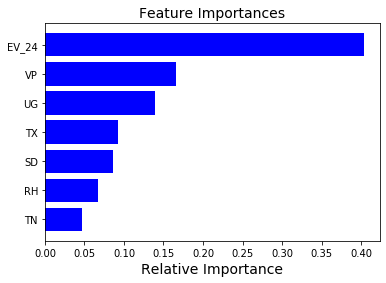

In [21]:

features = labels
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.title('Feature Importances',fontsize=14)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance',fontsize=14)
plt.show()



In [22]:
print(ypred)

[ 0.300769 26.454591 23.124277  4.949819  4.723293 16.724442  6.353386
  5.654822 -0.869693 22.825661 15.60513   7.012094 15.168197 -0.419004
 -0.966502 13.054165 -1.406273 34.154278 20.32254  -0.215621 13.286659
 14.466126 15.265507 40.789067 26.289881 35.321994 14.882735  7.5753
  0.892702]


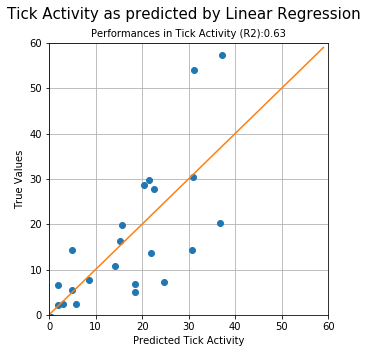

In [119]:
f, (ax1) = plt.subplots(1, 1, figsize=(5,5))

a = range(0,60)
b = a

ax1.set_xlim(0,60)
ax1.set_ylim(0,60)
ax1.plot(ypred,ytest,'o')
ax1.plot(a,b,)
ax1.set_xlabel("Predicted Tick Activity",fontsize=10)
ax1.set_ylabel("True Values",fontsize=10)
ax1.set_title("Performances in Tick Activity (R2):0.63",fontsize=10)
ax1.grid()


plt.suptitle("Tick Activity as predicted by Linear Regression",fontsize=15)
plt.savefig(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Graphs\crossplot.png")

In [23]:
pre_ede = np.loadtxt(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Data\ML_Training\weather_1516_mon.csv",delimiter = ',', skiprows = 1, usecols=range(3, 10))
print(pre_ede)

[[ 2.4200e+00  5.4680e+01  4.2550e+01  8.8840e+01  2.3200e+00  3.3000e-01
   3.5000e-01]
 [-1.1250e+01  6.2430e+01  1.8390e+01  8.8040e+01  5.8900e+00  2.9000e-01
   3.2000e-01]
 [ 6.3900e+00  1.0145e+02  2.6870e+01  8.0810e+01  1.1450e+01  2.7000e-01
   2.0200e+00]
 [ 1.5600e+01  1.4823e+02  9.4300e+00  7.1470e+01  2.2900e+01  2.2000e-01
   9.3500e+00]
 [ 5.3550e+01  1.7319e+02  2.3680e+01  7.1610e+01  2.5940e+01  1.6000e-01
   2.7300e+00]
 [ 8.6130e+01  2.0717e+02  1.8600e+01  7.0800e+01  3.3230e+01  1.3000e-01
   7.4200e+00]
 [ 1.2500e+02  2.3484e+02  4.2190e+01  7.5000e+01  3.2480e+01  8.8000e-01
   1.4500e+00]
 [ 1.3090e+02  2.3990e+02  4.3230e+01  7.6680e+01  2.8940e+01  1.1000e-01
   1.5300e+00]
 [ 8.7570e+01  1.7827e+02  2.6270e+01  8.5400e+01  1.5900e+01  2.7000e-01
   2.5800e+00]
 [ 5.7420e+01  1.3300e+02  1.1680e+01  8.8610e+01  8.9000e+00  2.0000e-01
   6.0300e+00]
 [ 6.1500e+01  1.2187e+02  5.0430e+01  8.8600e+01  4.0000e+00  1.6000e-01
   5.3300e+00]
 [ 6.8870e+01  1.1294

In [29]:
tick = rf.predict(pre_ede)
print(tick)

[ 3.763337  4.101102 10.589479 25.833876 24.279685 39.327784 32.284411
 23.992979 10.752007  9.486899  8.308607  8.197976  3.399972  5.024807
  9.547108 15.789262 26.795852 21.61022  27.003403 26.184856 30.060842
  9.86139   4.902244  4.214689]


In [ ]:
np.savetxt(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Data\Pre_processing\tick_activity2015_16.csv",tick)